In [1]:
! pip install pymongo

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pymongo

In [5]:
mongo_client=pymongo.MongoClient('mongodb://localhost:27017')
mongo_client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

# Create database

In [6]:
db_name = 'velocity'
db = mongo_client[db_name]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'velocity')

In [7]:
mongo_client.list_database_names()

['admin', 'config', 'local', 'velocity']

# Create Collections

In [8]:
collection_user = db['user_details']
collection_var = db['velocity_variable']
collection_result = db['result']

In [9]:
db.list_collection_names()



[]

In [10]:
mongo_client.list_database_names()

['admin', 'config', 'local']

# insert documents

### insert_one()

In [ ]:
used to insert only one record 

syntax 

collection_name.insert_one(data)

In [12]:
data={'Name':'Rohit','Mobile No':9922992299,'cpga':8.5,'email':'rohit@gmail.com','city':'pune'}
collection_user.insert_one(data)

In [ ]:
data = {'Name':'Rohit',"Mobile No":9922992299,"cgpa":8.5,"email":"rohit@gmail.com","city":"pune"}

In [13]:
mongo_client.list_database_names()

['admin', 'config', 'local', 'velocity']

In [14]:
db.list_collection_names()

['user_details']

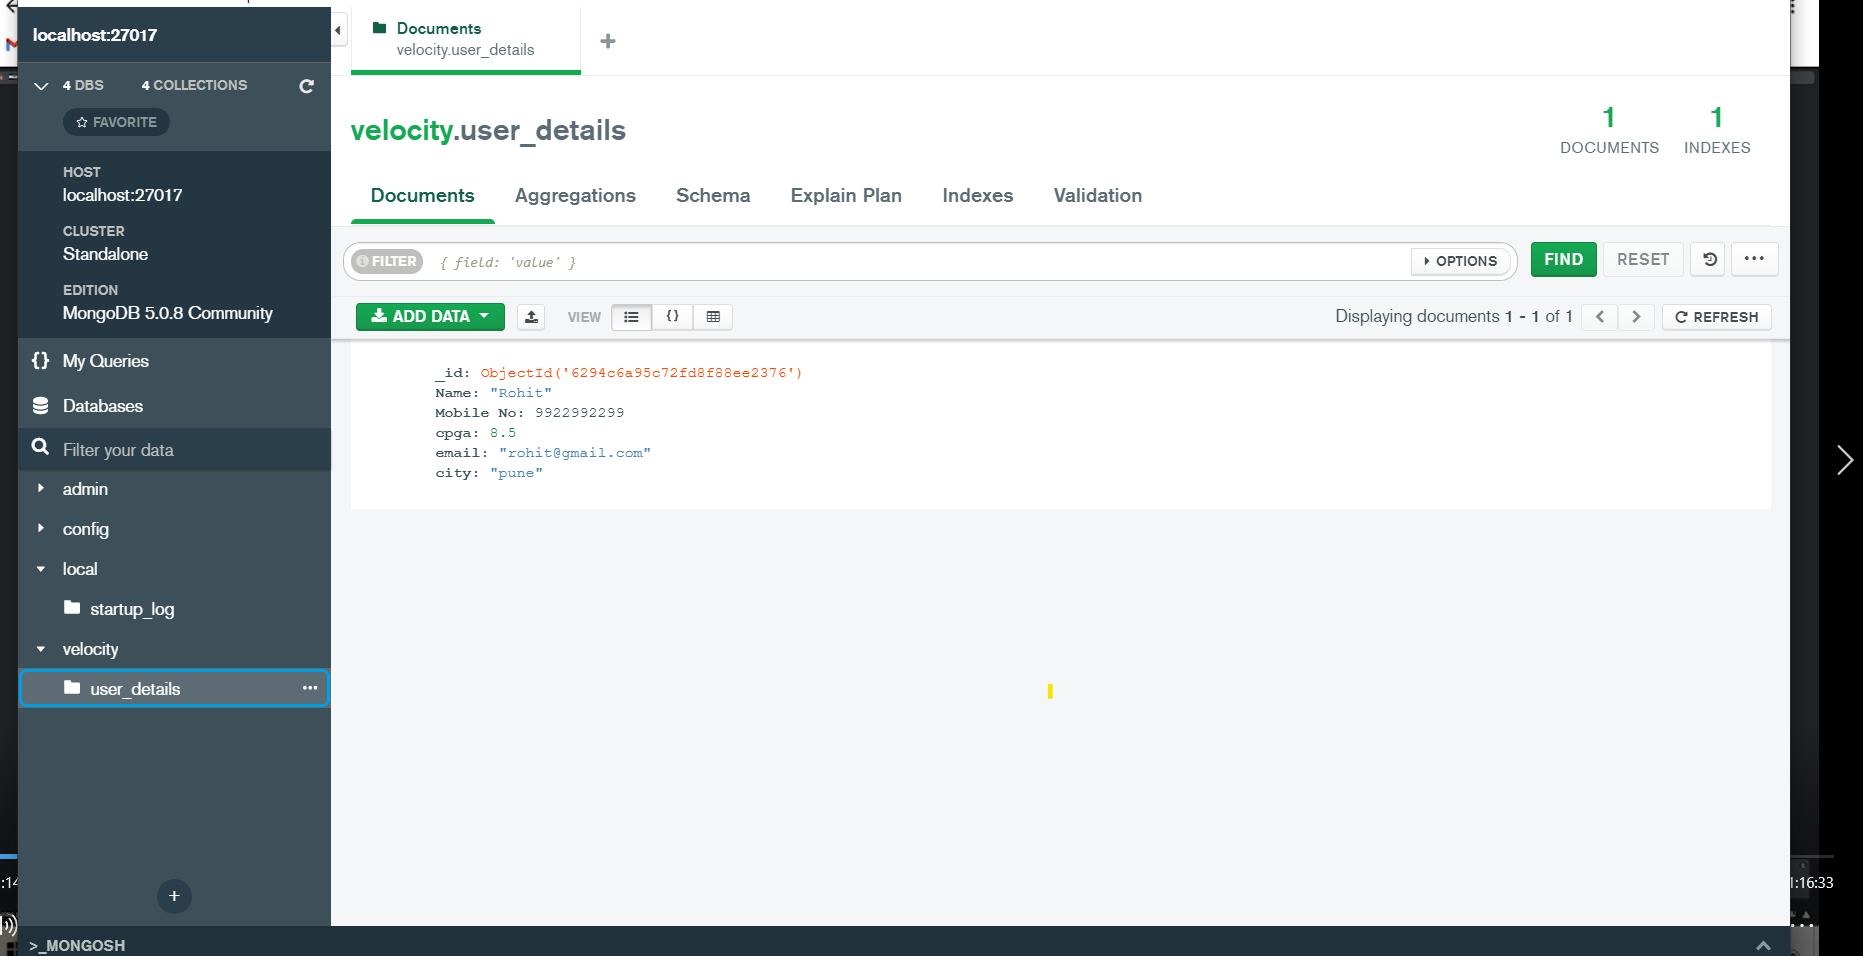

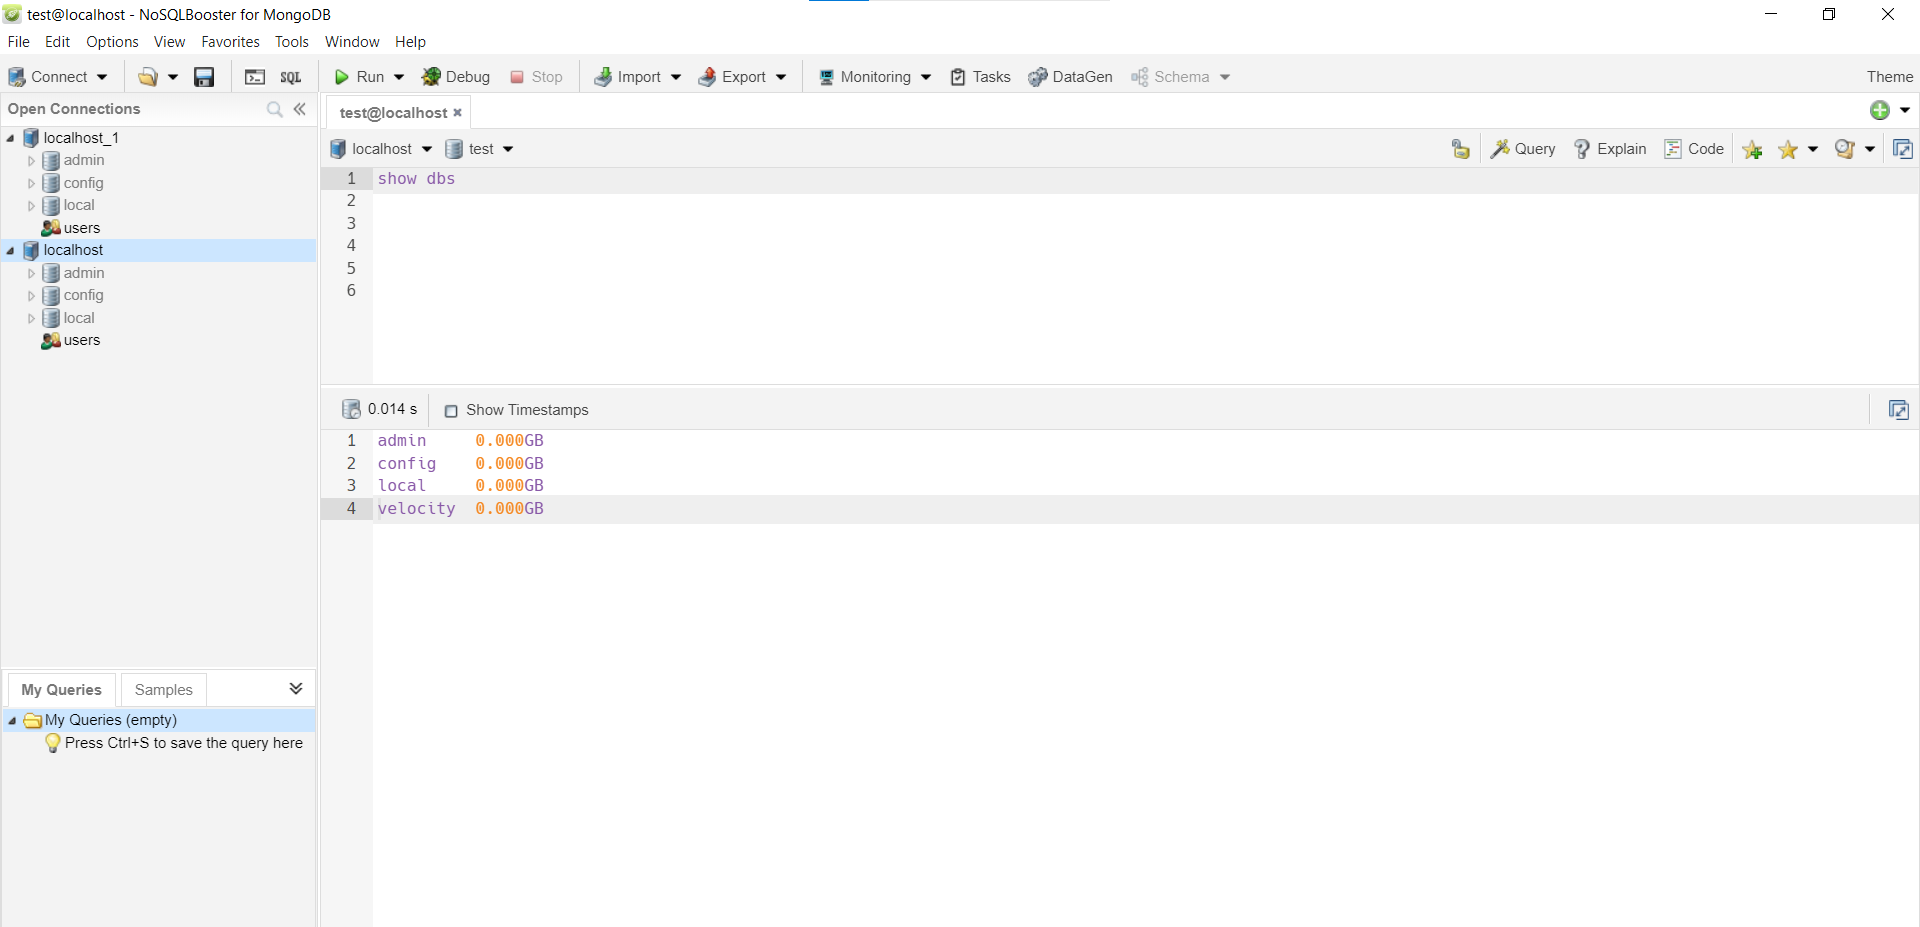

In [15]:
collection_user.insert_one({'Name':'Ajay',"Mobile No":9988998899,"cgpa":7.5,"email":"ajay@gmail.com","city":"mumbai"})

# insert_many()

In [ ]:
Used to insert multiple records

Syntax:
    
collection_name.insert_many(list of dict)

In [16]:
data = [{'Name':'Shiv',"Mobile No":9900099000,"cgpa":7.8,"email":"shiv@gmail.com","city":"mumbai"},
       {'Name':'max',"Mobile No":8822882288,"cgpa":6.5,"email":"max@gmail.com","city":"delhi"},
       {'Name':'Ram',"Mobile No":9990099900,"cgpa":5.5,"email":"ram@gmail.com","city":"chennai"}]
collection_user.insert_many(data)

In [17]:
import pandas as pd
import numpy as np

In [18]:
df=pd.DataFrame(np.random.randint(10,100, size=(10,5)), columns=list('ABCDE'))
df

,A,B,C,D,E
0,28,22,31,66,28
1,32,16,89,80,25
2,64,40,61,11,71
3,37,84,30,83,86
4,98,21,12,13,24
5,76,43,74,54,16
6,87,16,52,57,25
7,22,48,43,67,55
8,19,29,40,28,25
9,95,29,80,30,38


In [22]:
data=df.to_dict(orient='records')
collection_result.insert_many(data)

In [26]:
df_titanic=pd.read_csv('titanic.csv')
collection_var.insert_many(df_titanic.to_dict(orient='records'))

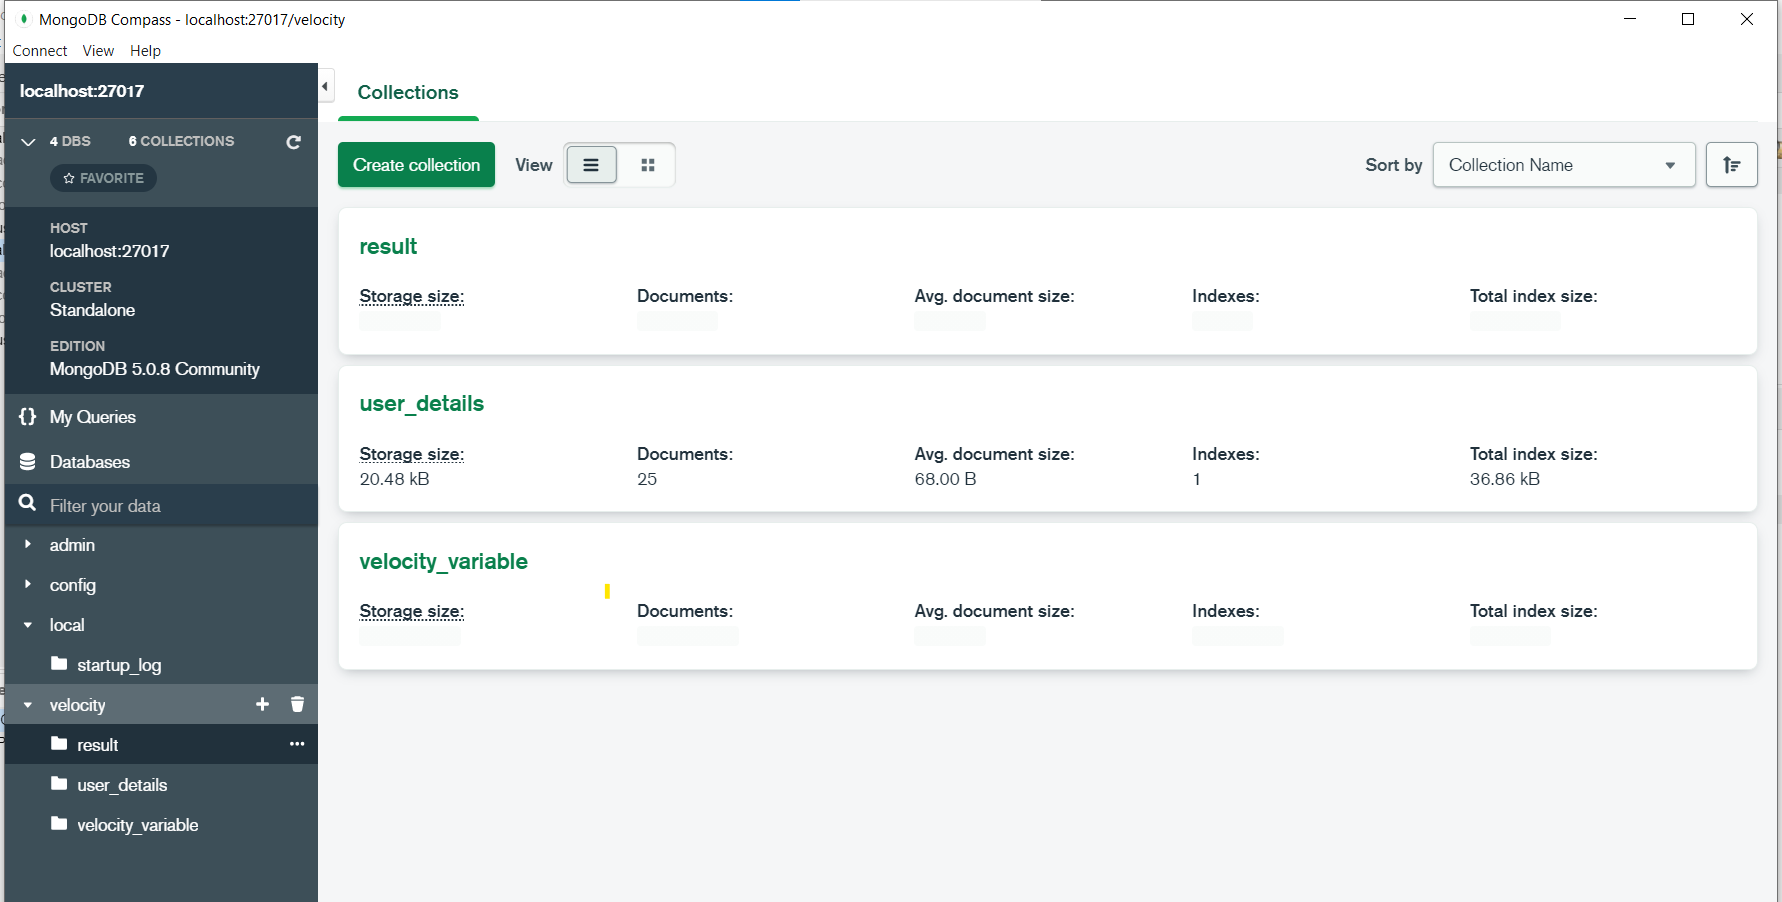

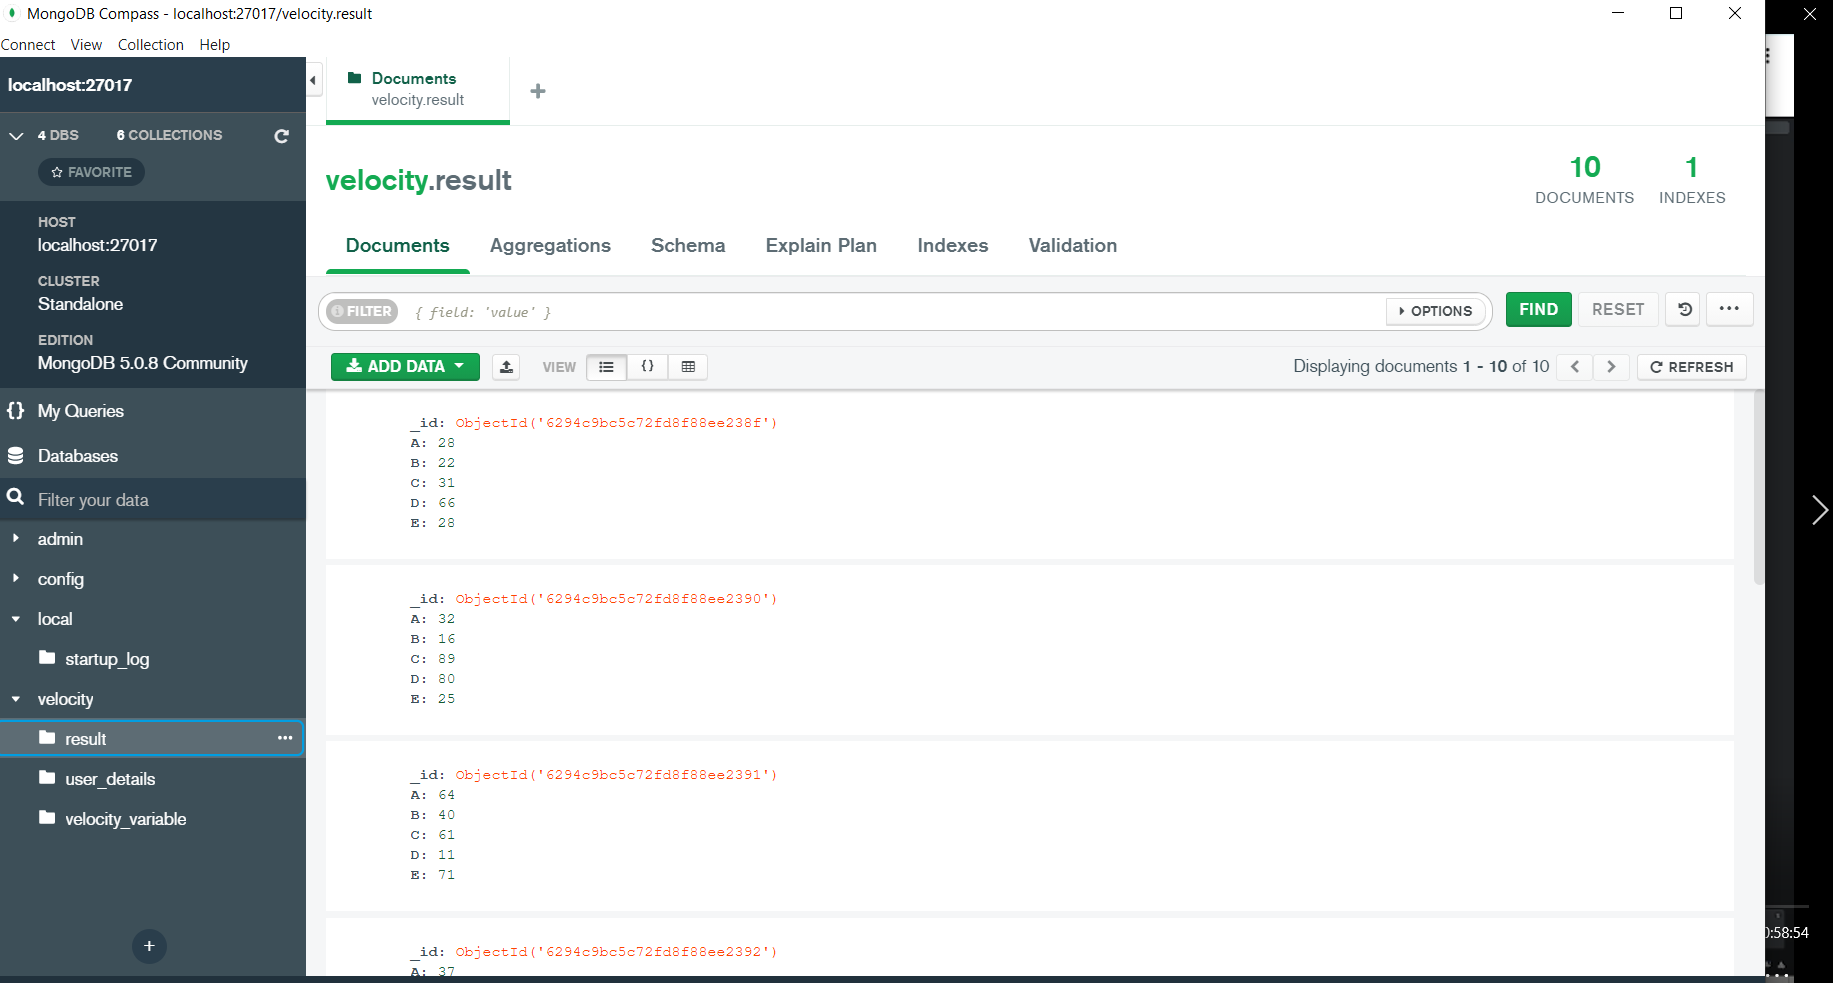

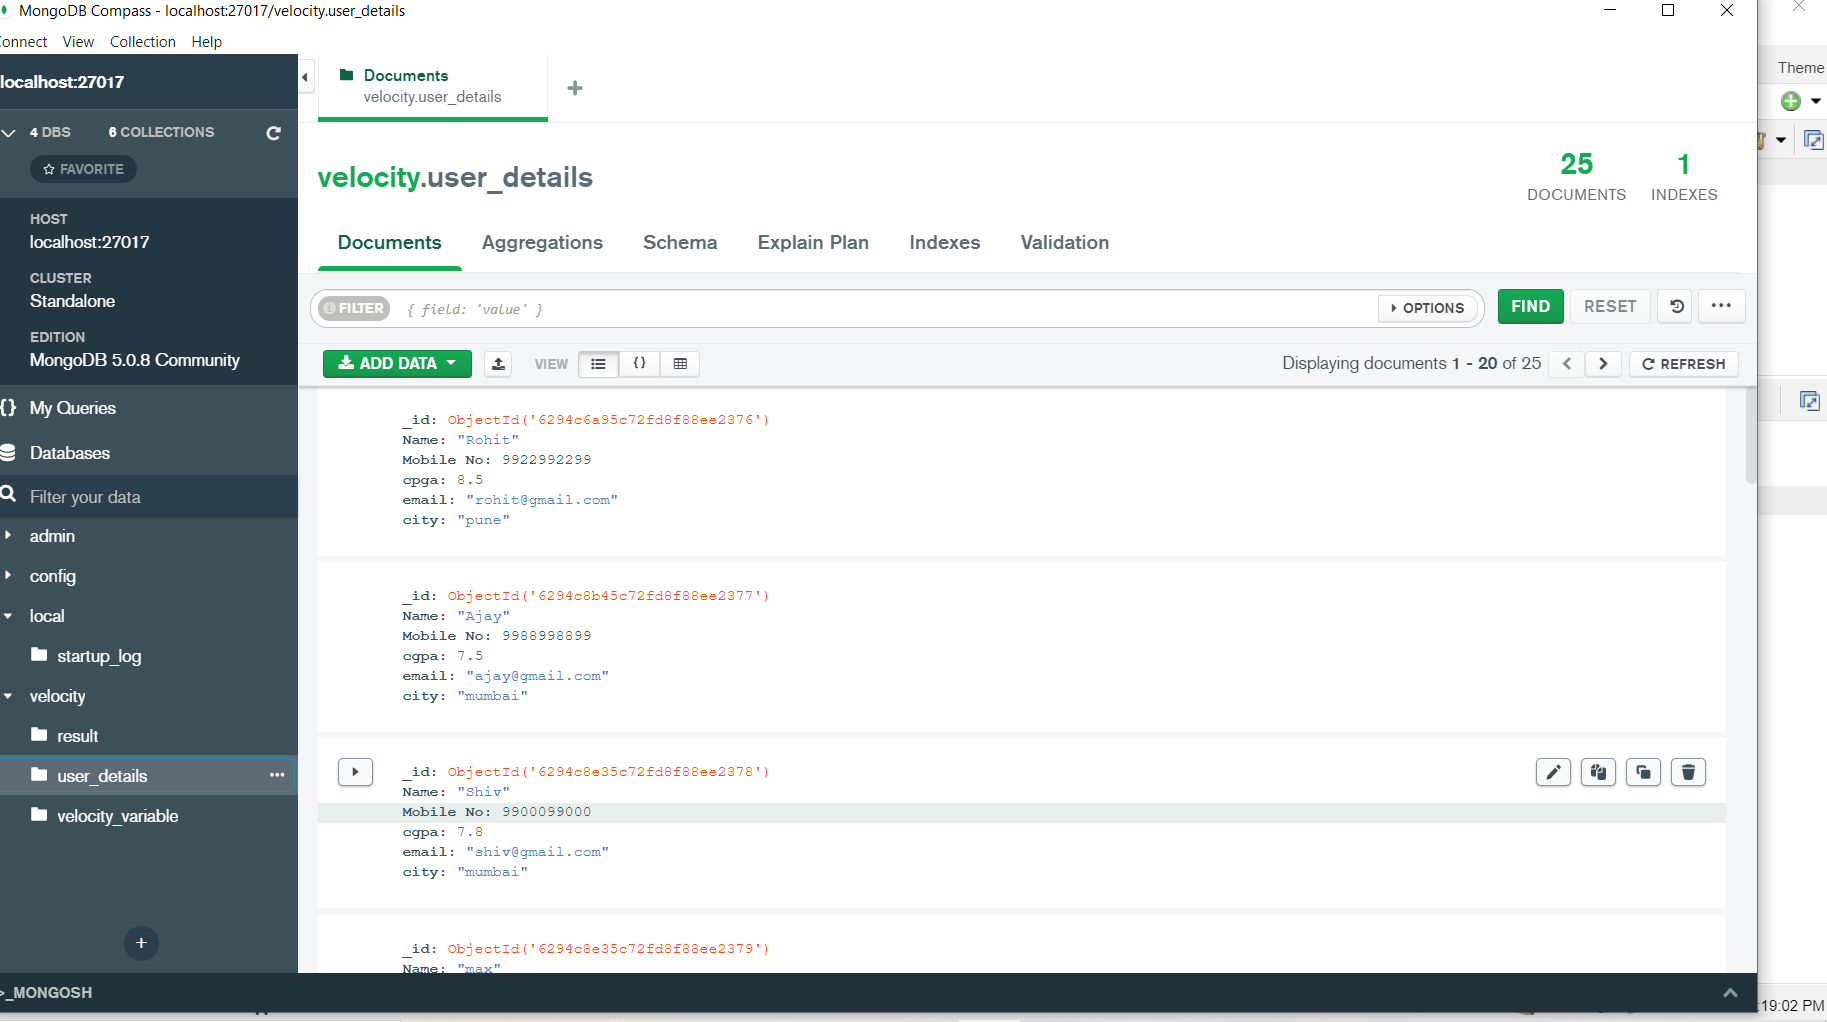

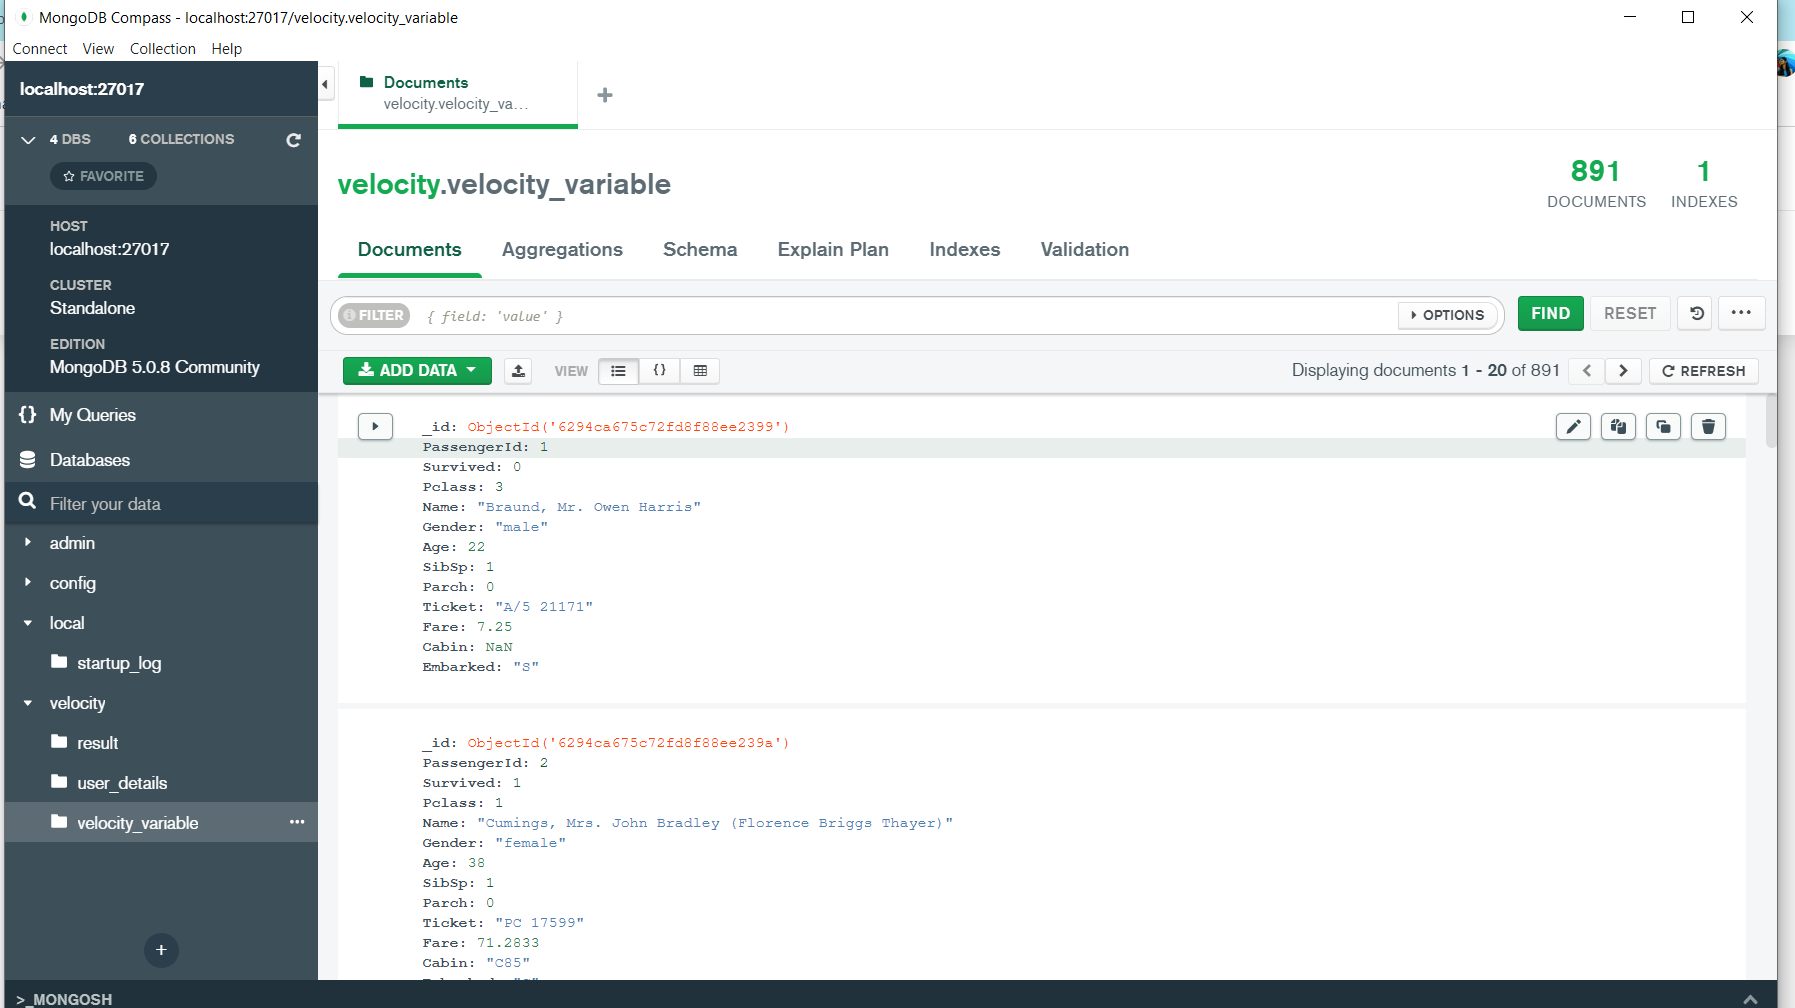

# 2. Find
2.1 find_one

In [27]:
result = collection_user.find_one({'Name':"Rohit"})
result

{'_id': ObjectId('6294c6a95c72fd8f88ee2376'),
 'Name': 'Rohit',
 'Mobile No': 9922992299,
 'cpga': 8.5,
 'email': 'rohit@gmail.com',
 'city': 'pune'}

In [28]:
data = {'Name':'Rohit',"Mobile No":9922992299,"cgpa":8.5,"email":"rohit@gmail.com","city":"mumbai"}
collection_user.insert_one(data)

In [29]:
result = collection_user.find_one({'Name':"Rohit"})
result

{'_id': ObjectId('6294c6a95c72fd8f88ee2376'),
 'Name': 'Rohit',
 'Mobile No': 9922992299,
 'cpga': 8.5,
 'email': 'rohit@gmail.com',
 'city': 'pune'}

In [30]:
result = collection_user.find_one({'Name':"Rohit",'city':"mumbai",'email':'rohit10@gmail.com'})
result
# if not found

In [31]:
### User Sign UP 

result = collection_user.find_one({'email':'rohit10@gmail.com'})

if result:
    print("User already exist")
    
else:
    collection_user.insert_one({'Name':'Rohit',"Mobile No":7799779911,"cgpa":8.5,"email":"rohit10@gmail.com","city":"kolkata"})
    
    if user find it will give output, but if user not found update new data into database

# 2.2 find

In [32]:
result = collection_user.find() # it will give object
result
list(result)

[{'_id': ObjectId('6294c6a95c72fd8f88ee2376'),
  'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cpga': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'pune'},
 {'_id': ObjectId('6294c8b45c72fd8f88ee2377'),
  'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'_id': ObjectId('6294c8e35c72fd8f88ee2378'),
  'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'_id': ObjectId('6294c8e35c72fd8f88ee2379'),
  'Name': 'max',
  'Mobile No': 8822882288,
  'cgpa': 6.5,
  'email': 'max@gmail.com',
  'city': 'delhi'},
 {'_id': ObjectId('6294c8e35c72fd8f88ee237a'),
  'Name': 'Ram',
  'Mobile No': 9990099900,
  'cgpa': 5.5,
  'email': 'ram@gmail.com',
  'city': 'chennai'},
 {'_id': ObjectId('6294c97b5c72fd8f88ee237b'),
  'A': 28,
  'B': 22,
  'C': 31,
  'D': 66,
  'E': 28},
 {'_id': ObjectId('6294c97b5c72fd8f88ee237c'),
  'A': 32,
  'B': 16,
  'C': 89,
  'D': 80,
  'E': 25},
 {'_id': Obje

In [33]:
result = collection_user.find({'city':'mumbai'})
list(result)

[{'_id': ObjectId('6294c8b45c72fd8f88ee2377'),
  'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'_id': ObjectId('6294c8e35c72fd8f88ee2378'),
  'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'_id': ObjectId('6294cbaf5c72fd8f88ee2714'),
  'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cgpa': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'mumbai'}]

In [34]:
result = collection_user.find({'Name':'Rohit','city':'mumbai'})
list(result)

[{'_id': ObjectId('6294cbaf5c72fd8f88ee2714'),
  'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cgpa': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'mumbai'}]

In [35]:
result = collection_user.find({'Name':'Rohit','city':'nagpur'})
list(result)

[]

In [37]:
result = collection_user.find({'city':'mumbai'},{'_id':0,'Name':1}) # 0 - hide, 1- show
list(result)

[{'Name': 'Ajay'}, {'Name': 'Shiv'}, {'Name': 'Rohit'}]

In [38]:
result = collection_user.find({'city':'mumbai'},{'_id':0,'Name':0})
list(result)

[{'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'Mobile No': 9922992299,
  'cgpa': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'mumbai'}]

In [39]:
result = collection_user.find({'city':'mumbai'},{'_id':0,'cgpa':0,'city':0})
list(result)

[{'Name': 'Ajay', 'Mobile No': 9988998899, 'email': 'ajay@gmail.com'},
 {'Name': 'Shiv', 'Mobile No': 9900099000, 'email': 'shiv@gmail.com'},
 {'Name': 'Rohit', 'Mobile No': 9922992299, 'email': 'rohit@gmail.com'}]

In [46]:
result = collection_user.find({},{'_id':0,'cgpa':0,'city':0})
data = list(result)
name_df = pd.DataFrame(data)
name_df

,Name,Mobile No,cpga,email,A,B,C,D,E
0,Rohit,9.922992e+09,8.5,rohit@gmail.com,NaN,NaN,NaN,NaN,NaN
1,Ajay,9.988999e+09,NaN,ajay@gmail.com,NaN,NaN,NaN,NaN,NaN
2,Shiv,9.900099e+09,NaN,shiv@gmail.com,NaN,NaN,NaN,NaN,NaN
3,max,8.822882e+09,NaN,max@gmail.com,NaN,NaN,NaN,NaN,NaN
4,Ram,9.990100e+09,NaN,ram@gmail.com,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,28.0,22.0,31.0,66.0,28.0
6,NaN,NaN,NaN,NaN,32.0,16.0,89.0,80.0,25.0
7,NaN,NaN,NaN,NaN,64.0,40.0,61.0,11.0,71.0
8,NaN,NaN,NaN,NaN,37.0,84.0,30.0,83.0,86.0
9,NaN,NaN,NaN,NaN,98.0,21.0,12.0,13.0,24.0


# Sorting
Ascending Order

In [ ]:
syntax:
    
    collection_name.find(query).sort('key')

In [47]:
data = collection_var.find({},{'_id':0,'Age':1,'Fare':1}).sort('Fare')
list(data)

[{'Age': 36.0, 'Fare': 0.0},
 {'Age': 40.0, 'Fare': 0.0},
 {'Age': 25.0, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': 19.0, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': 49.0, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': 39.0, 'Fare': 0.0},
 {'Age': nan, 'Fare': 0.0},
 {'Age': 38.0, 'Fare': 0.0},
 {'Age': 20.0, 'Fare': 4.0125},
 {'Age': 33.0, 'Fare': 5.0},
 {'Age': 61.0, 'Fare': 6.2375},
 {'Age': 34.5, 'Fare': 6.4375},
 {'Age': 43.0, 'Fare': 6.45},
 {'Age': 34.0, 'Fare': 6.4958},
 {'Age': 18.0, 'Fare': 6.4958},
 {'Age': 19.0, 'Fare': 6.75},
 {'Age': 18.0, 'Fare': 6.75},
 {'Age': nan, 'Fare': 6.8583},
 {'Age': nan, 'Fare': 6.95},
 {'Age': 45.0, 'Fare': 6.975},
 {'Age': 27.0, 'Fare': 6.975},
 {'Age': 29.0, 'Fare': 7.0458},
 {'Age': 20.0, 'Fare': 7.05},
 {'Age': 24.0, 'Fare': 7.05},
 {'Age': 35.0, 'Fare': 7.05},
 {'Age': 38.0, 'Fare': 7.05},
 {'Age': nan, 'Fare'

In [48]:
result = collection_user.find({},{'_id':0,'cgpa':0,'city':0}).sort('Name')
data = list(result)
data

[{'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'Name': 'Ajay', 'Mobile No': 998899889

## Descending order

In [9]:
result = collection_user.find({},{'_id':0,'cgpa':0,'city':0}).sort('Name',-1)
data = list(result)
data

[{'Name': 'max', 'Mobile No': 8822882288, 'email': 'max@gmail.com'},
 {'Name': 'Shiv', 'Mobile No': 9900099000, 'email': 'shiv@gmail.com'},
 {'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cpga': 8.5,
  'email': 'rohit@gmail.com'},
 {'Name': 'Rohit', 'Mobile No': 9922992299, 'email': 'rohit@gmail.com'},
 {'Name': 'Rohit', 'Mobile No': 7799779911, 'email': 'rohit10@gmail.com'},
 {'Name': 'Ram', 'Mobile No': 9990099900, 'email': 'ram@gmail.com'},
 {'Name': 'Ajay', 'Mobile No': 9988998899, 'email': 'ajay@gmail.com'},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},


In [10]:
result = collection_user.find({},{'_id':0,'cgpa':0,'city':0}).sort('Name',-1).sort('Mobile No')
data = list(result)
data

[{'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'Name': 'Rohit', 'Mobile No': 77997799

# Magic Command

In [ ]:
# $ -- >> magic command 

In [11]:
query = {"Name":{'$regex':'^R'}}
result = collection_user.find(query,{'_id':0})
data = list(result)
data

[{'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cpga': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'pune'},
 {'Name': 'Ram',
  'Mobile No': 9990099900,
  'cgpa': 5.5,
  'email': 'ram@gmail.com',
  'city': 'chennai'},
 {'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cgpa': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Rohit',
  'Mobile No': 7799779911,
  'cgpa': 8.5,
  'email': 'rohit10@gmail.com',
  'city': 'kolkata'}]

In [12]:
query = {"Name":{'$regex':'^Ram'}}
result = collection_user.find(query,{'_id':0})
data = list(result)
data

[{'Name': 'Ram',
  'Mobile No': 9990099900,
  'cgpa': 5.5,
  'email': 'ram@gmail.com',
  'city': 'chennai'}]

In [13]:
query = {"cgpa":{'$gt':7}} # greater than
result = collection_user.find(query,{'_id':0})
data = list(result)
data

[{'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Rohit',
  'Mobile No': 9922992299,
  'cgpa': 8.5,
  'email': 'rohit@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Rohit',
  'Mobile No': 7799779911,
  'cgpa': 8.5,
  'email': 'rohit10@gmail.com',
  'city': 'kolkata'}]

In [14]:
query = {"cgpa":{'$lt':7}} # less than 
result = collection_user.find(query,{'_id':0})
data = list(result)
data

[{'Name': 'max',
  'Mobile No': 8822882288,
  'cgpa': 6.5,
  'email': 'max@gmail.com',
  'city': 'delhi'},
 {'Name': 'Ram',
  'Mobile No': 9990099900,
  'cgpa': 5.5,
  'email': 'ram@gmail.com',
  'city': 'chennai'}]

# Delete
3.1 delete_one

In [15]:
query = {"Name":"Rohit"}
collection_user.delete_one(query)

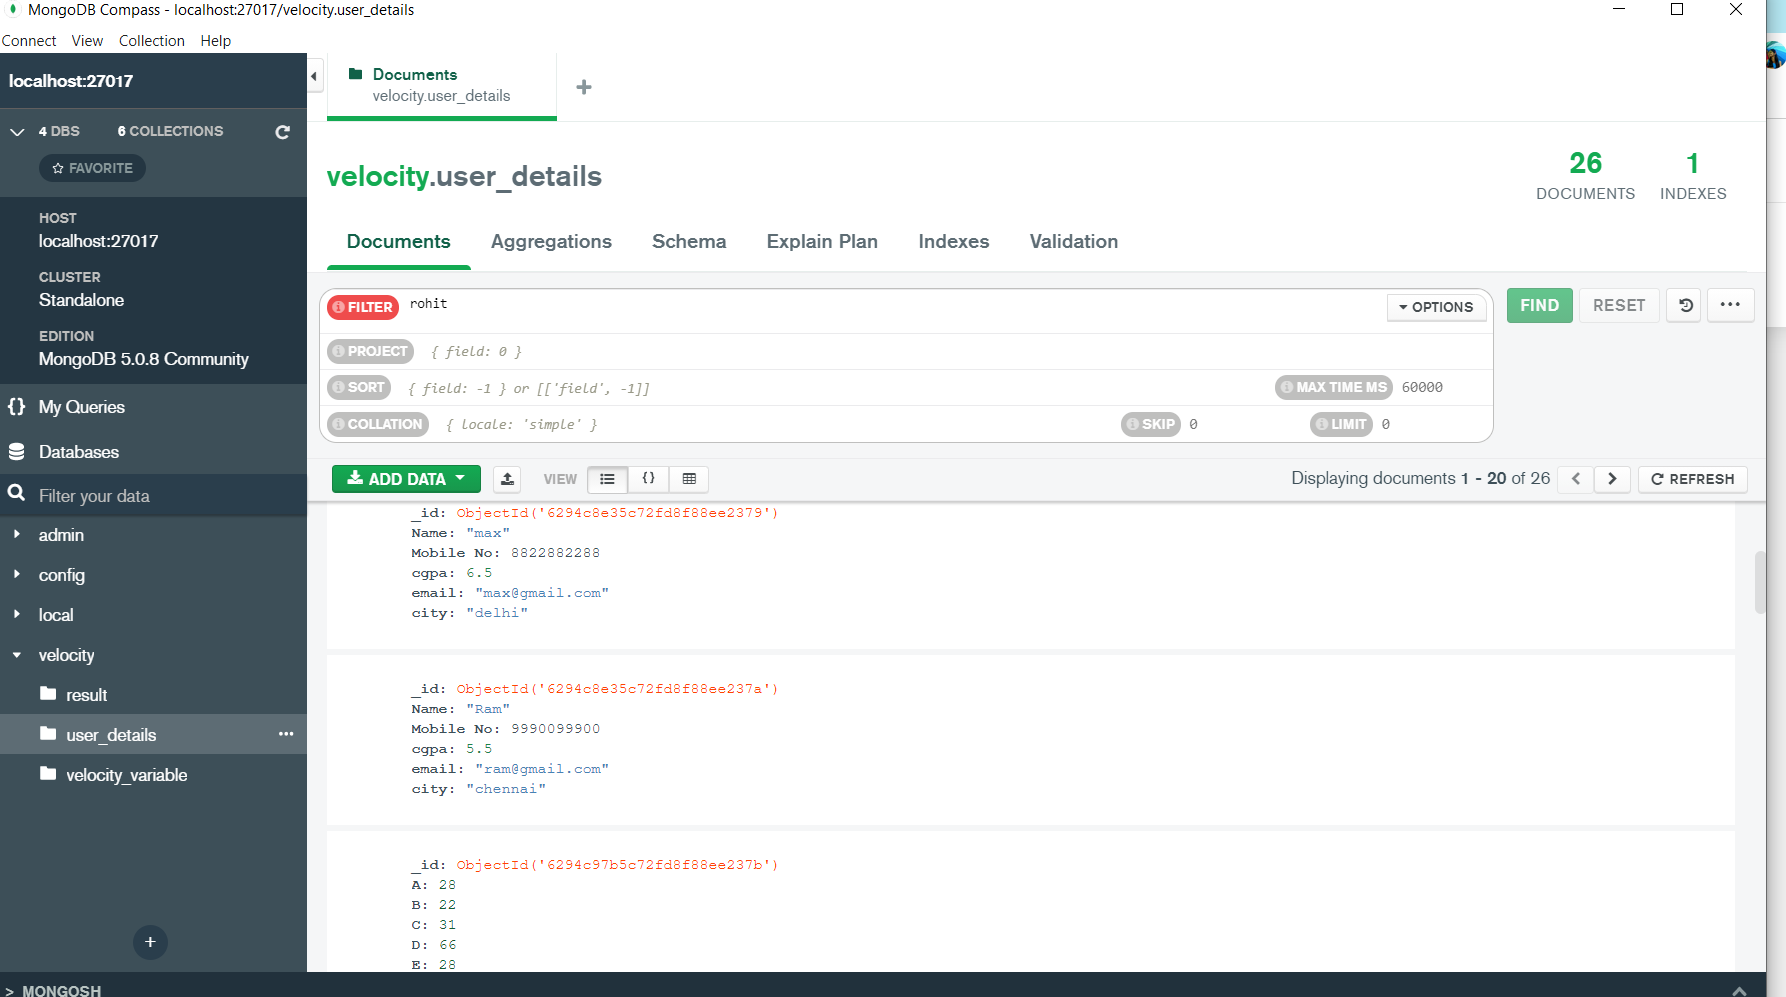

In [16]:
query = {"Name":"Rohit"}
collection_user.delete_one(query)

In [17]:
result = collection_user.find({},{'_id':0})
data = list(result)
data

[{'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'Name': 'max',
  'Mobile No': 8822882288,
  'cgpa': 6.5,
  'email': 'max@gmail.com',
  'city': 'delhi'},
 {'Name': 'Ram',
  'Mobile No': 9990099900,
  'cgpa': 5.5,
  'email': 'ram@gmail.com',
  'city': 'chennai'},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80

In [18]:
query={"cgpa":{"$lt":7}}
collection_user.delete_many(query)

In [22]:
result = collection_user.find({},{'A':0,'B':0,'C':0,'D':0,'E':0,'_id':0})
data = list(result)
data

[{'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'Name': 'Rohit',
  'Mobile No': 7799779911,
  'cgpa': 8.5,
  'email': 'rohit10@gmail.com',
  'city': 'kolkata'}]

## 3.3 Delete Collection

In [ ]:
syntax
collection_name.drop()


In [23]:
collection_result.drop()

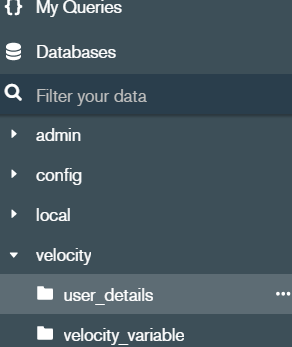

# 4. update

In [ ]:
old_query = {}
new_query = {}

collection_name.update_one(old_query,new_query)

4.1 update_one

In [24]:
old_query = {'city':'mumbai'}
new_query = {'$set':{'city':'pune'}}
collection_user.update_one(old_query,new_query)

In [26]:
result = collection_user.find({},{'A':0,'B':0,'C':0,'D':0,'E':0,'_id':0})
data = list(result)
data

[{'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'pune'},
 {'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'Name': 'Rohit',
  'Mobile No': 7799779911,
  'cgpa': 8.5,
  'email': 'rohit10@gmail.com',
  'city': 'kolkata'}]

In [27]:
old_query = {'city':'pune'}
new_query = {'$set':{'city':'mumbai'}}
collection_user.update_one(old_query,new_query)

In [28]:
result = collection_user.find({},{'_id':0})
data = list(result)
data

[{'Name': 'Ajay',
  'Mobile No': 9988998899,
  'cgpa': 7.5,
  'email': 'ajay@gmail.com',
  'city': 'mumbai'},
 {'Name': 'Shiv',
  'Mobile No': 9900099000,
  'cgpa': 7.8,
  'email': 'shiv@gmail.com',
  'city': 'mumbai'},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, 'B': 16, 'C': 52, 'D': 57, 'E': 25},
 {'A': 22, 'B': 48, 'C': 43, 'D': 67, 'E': 55},
 {'A': 19, 'B': 29, 'C': 40, 'D': 28, 'E': 25},
 {'A': 95, 'B': 29, 'C': 80, 'D': 30, 'E': 38},
 {'A': 28, 'B': 22, 'C': 31, 'D': 66, 'E': 28},
 {'A': 32, 'B': 16, 'C': 89, 'D': 80, 'E': 25},
 {'A': 64, 'B': 40, 'C': 61, 'D': 11, 'E': 71},
 {'A': 37, 'B': 84, 'C': 30, 'D': 83, 'E': 86},
 {'A': 98, 'B': 21, 'C': 12, 'D': 13, 'E': 24},
 {'A': 76, 'B': 43, 'C': 74, 'D': 54, 'E': 16},
 {'A': 87, '

# 4.2 update_many()

In [29]:
old_query = {'city':'mumbai'}
new_query = {'$set':{'city':'delhi'}}
collection_user.update_many(old_query,new_query)